In [4]:
import os
import cv2
import numpy as np
from tqdm import tqdm  # To see Progress

REBUILD_DATA = True  #Only Rebuild first time (preprocess data first time)

class HappyOrSad():
    IMG_SIZE = 50   #Change size to 50X50

    HAPPY = "FaceExpression/happy"
    SAD = "FaceExpression/sad"

    LABELS = {HAPPY: 0,SAD: 1}

    training_data = []

    happyCount = 0
    sadCount = 0

    def make_training_data(self):
        for label in self.LABELS:
            print(label)
            for f in tqdm(os.listdir(label)):
                try:
                    path = os.path.join(label,f)
                    img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
                    img = cv2.resize(img,(self.IMG_SIZE,self.IMG_SIZE))
                    self.training_data.append([np.array(img),np.eye(2)[self.LABELS[label]]])

                    if label==self.SAD:
                        self.sadCount +=1
                    elif label == self.HAPPY:
                        self.happyCount+=1
                except Exception as e:
                    # pass
                    print(e)
        np.random.shuffle(self.training_data)
        np.save("training_data.npy",self.training_data)
        print("SAD  : ",self.sadCount)
        print("HAPPY  : ",self.happyCount)


if REBUILD_DATA:
    happyorsad = HappyOrSad()
    happyorsad.make_training_data()       


FaceExpression/happy


100%|██████████| 153/153 [00:02<00:00, 56.00it/s] 


FaceExpression/sad


100%|██████████| 152/152 [00:02<00:00, 73.96it/s] 

SAD  :  152
HAPPY  :  153



C:\Programming\Python\Lib\site-packages\numpy\lib\npyio.py:521: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


In [5]:
np.eye(2)[0]
# np.eye(2)
# [[1,0],
#  [0,1]]

array([1., 0.])

In [6]:
training_data = np.load("training_data.npy",allow_pickle=True)

In [7]:
len(training_data)

305

In [8]:
training_data[0]

array([array([[188, 171, 195, ..., 254, 254, 254],
              [189, 171, 194, ..., 253, 254, 254],
              [191, 169, 191, ..., 254, 254, 254],
              ...,
              [ 87,  97, 107, ..., 104, 112, 101],
              [ 81,  86, 104, ..., 106, 106,  81],
              [ 87,  74,  97, ..., 103,  87,  65]], dtype=uint8),
       array([0., 1.])], dtype=object)

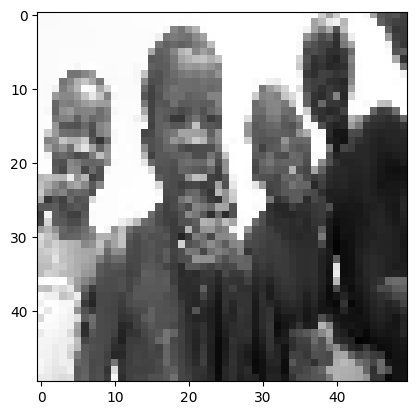

In [9]:
import matplotlib.pyplot as plt
plt.imshow(training_data[1][0],cmap="gray")

In [10]:
training_data[1][1]

array([1., 0.])